In [79]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
%matplotlib inline
from  matplotlib.ticker import PercentFormatter
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [64]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 9 columns):
M                     10578 non-null object
3.1109999999999998    10046 non-null float64
2.4989999999999997    10050 non-null float64
0.816                 10043 non-null float64
5.844599999999999     10054 non-null float64
3.0446999999999997    10052 non-null float64
Unnamed: 6            10073 non-null float64
1.9924630823006226    10018 non-null float64
8                     10578 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 743.8+ KB


In [65]:
train.describe()

,3.1109999999999998,2.4989999999999997,0.816,5.844599999999999,3.0446999999999997,Unnamed: 6,1.9924630823006226,8
count,10046.000000,10050.000000,10043.000000,10054.000000,10052.000000,10073.000000,10018.000000,10578.000000
mean,2.799380,2.191912,0.767050,4.472694,2.005271,1.008515,1.296892,9.701361
std,0.528431,0.443925,0.235200,2.332825,1.107281,0.544529,0.641084,1.901408
min,1.045500,0.790500,0.000000,0.216750,0.086700,0.028050,0.079050,7.000000
25%,2.422500,1.887000,0.637500,2.629050,1.129650,0.586500,0.793050,8.000000
50%,2.856000,2.244000,0.765000,4.276350,1.881900,0.938400,1.249500,9.000000
75%,3.187500,2.499000,0.892500,6.002700,2.703000,1.351500,1.708500,11.000000
max,4.569913,3.776277,6.007583,14.175450,7.588800,3.876000,4.896377,16.000000


In [55]:
train.head(5)

,M,3.1109999999999998,2.4989999999999997,0.816,5.844599999999999,3.0446999999999997,Unnamed: 6,1.9924630823006226,8
0,M,2.3715,1.8360,0.5355,2.19810,1.222069,0.545700,NaN,9
1,M,2.4990,2.0145,0.7140,2.79990,1.129650,0.650250,0.7650,11
2,M,3.2130,2.5245,0.8160,5.57430,2.534700,1.127100,1.6065,12
3,M,2.9325,2.2185,0.6885,5.05920,2.203200,1.254302,NaN,10
4,M,3.6465,2.7285,0.9690,8.54505,4.533900,1.596300,2.1420,10


In [74]:
def fill_na(data, fill = 'mean'):
        data = pd.DataFrame(data)
        for col in data.columns:
            if fill == 'mean':
                tmp = data[col].mean()
            if fill =='median':
                tmp = data[col].median()
            if fill == 'mode':
                tmp = data[col].mode()[0]
            for i in range(len(data[col])):
                if pd.isnull(data.loc[i, col]):
                    data.loc[i, col] = tmp
        return data
    

In [57]:
def drop_na(df, axis = 'row'):
        row = set([])
        cols = set([])
        for col in df.columns:
            for i in range(len(df[col])):
                if pd.isnull(df.loc[i, col]):
                    row.add(i)
                    cols.add(col)
        if axis == 'row':
            df = df.drop(row, axis = 0)
        else:
            df = df.drop(cols, axis = 1)
        df.index = list(range(df.shape[0]))
        return df
  

In [92]:
train = drop_na(train)

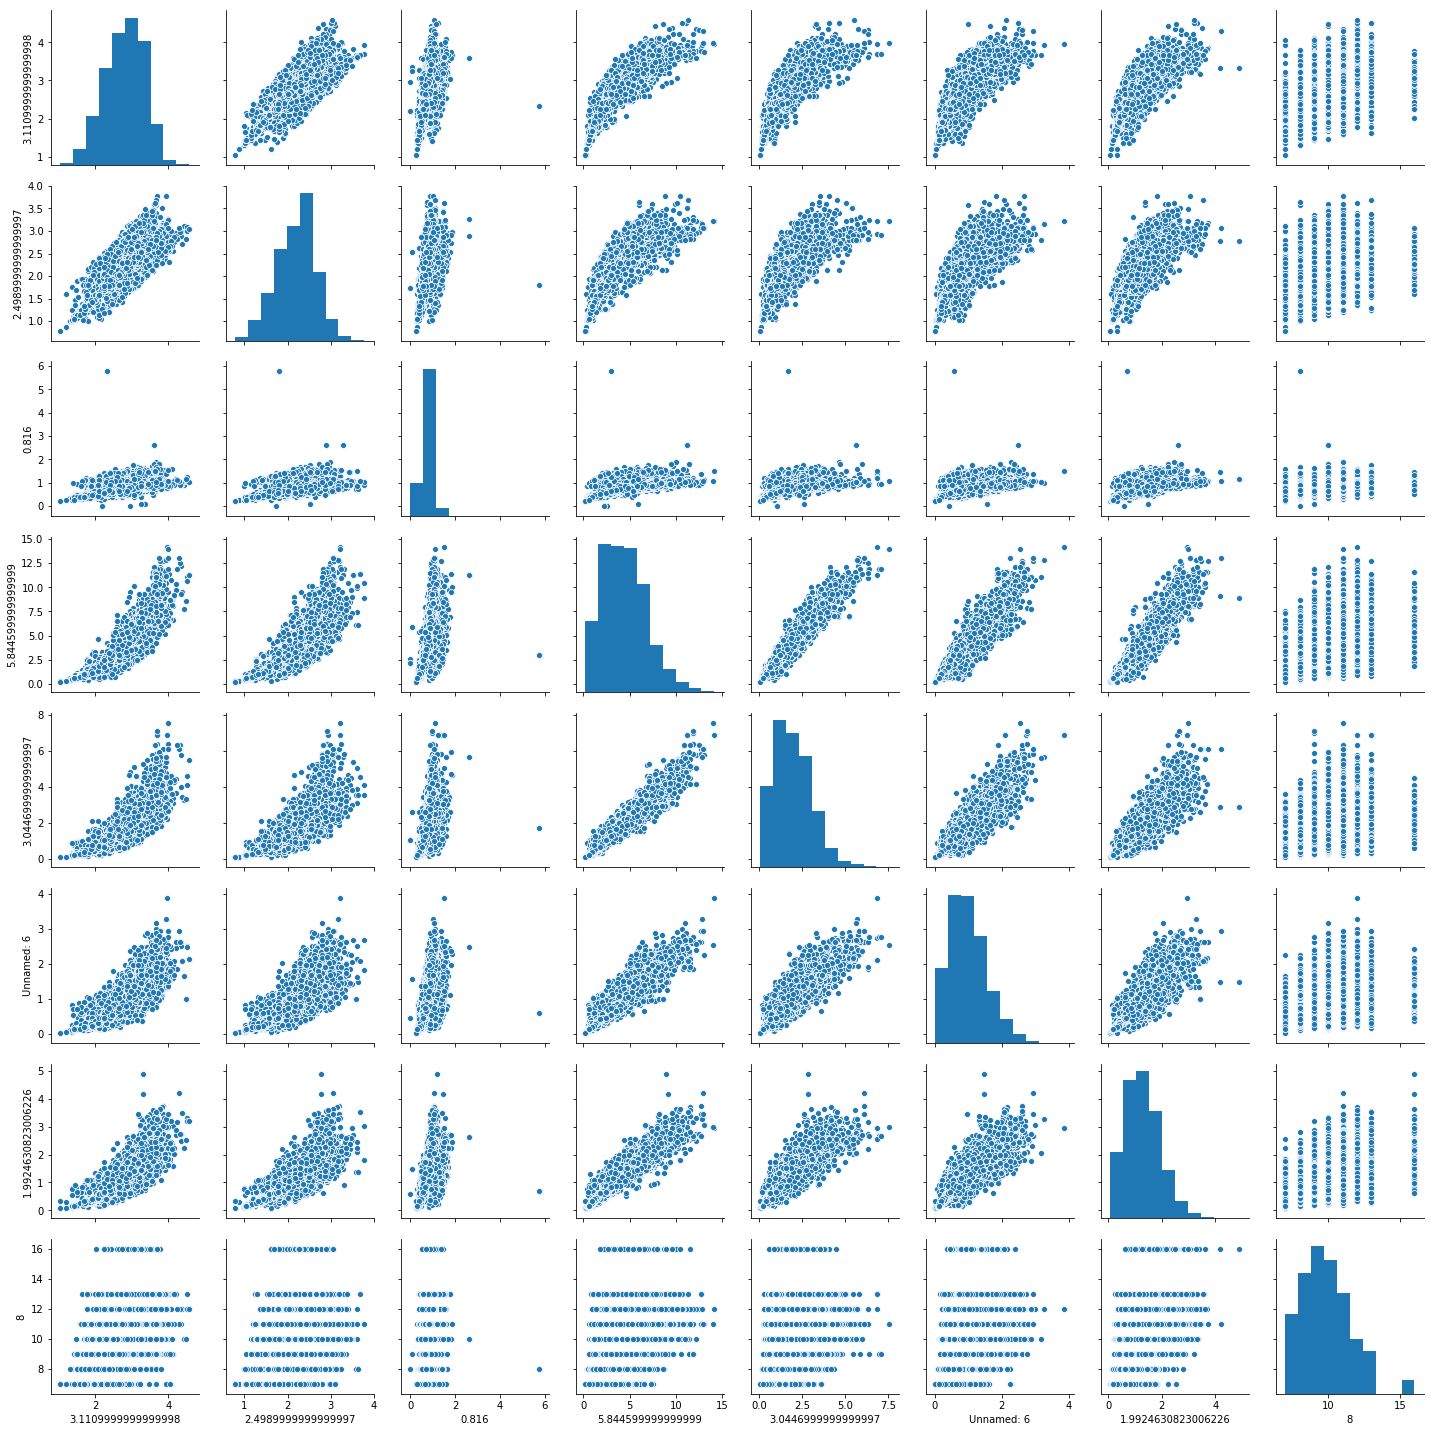

In [59]:
sb.pairplot(train)
#Можно заметить что все фичи коррелирую между собой. Фичу 4 можно исключить так как с ней корреляция самая большая.

In [72]:
train = train[['M', '3.1109999999999998', '2.4989999999999997', '0.816', '3.0446999999999997', 'Unnamed: 6',
       '1.9924630823006226', '8']] 

In [77]:
train.head()

,M,3.1109999999999998,2.4989999999999997,0.816,3.0446999999999997,Unnamed: 6,1.9924630823006226,8
0,1,2.3715,1.8360,0.5355,1.222069,0.545700,1.485492,9
1,1,2.4990,2.0145,0.7140,1.129650,0.650250,0.765000,11
2,1,3.2130,2.5245,0.8160,2.534700,1.127100,1.606500,12
3,1,2.9325,2.2185,0.6885,2.203200,1.254302,1.485492,10
4,1,3.6465,2.7285,0.9690,4.533900,1.596300,2.142000,10


In [76]:
train['1.9924630823006226'] = fill_na(train['1.9924630823006226'])

,3.162,2.448,0.7649999999999999,5.617649999999999,2.5321499999999997,1.2392999999999998,1.5554999999999999,10
M,,,,,,,,
--,88,88,88,88,88,88,88,88
?,10,10,10,10,10,10,10,10
F,606,606,606,606,606,606,606,606
I,448,448,448,448,448,448,448,448
M,714,714,714,714,714,714,714,714


In [66]:
train['M'] = train['M'].replace('M',1)
train['M'] = train['M'].replace('F',0)
test['M'] = test['M'].replace('M',1)
test['M'] = test['M'].replace('F',0)

In [67]:
def drop_nan(df, axis = 'row'):
        row = set([])
        col = df.columns.values[0]
        for i in range(len(df[col])):
            if df.loc[i, col] != 1 and df.loc[i, col] != 0:
                row.add(i)
        if axis == 'row':
            df = df.drop(row, axis = 0)
        df.index = list(range(df.shape[0]))
        return df

In [91]:
train = drop_nan(train)

In [93]:
train.groupby('M').count()

,3.1109999999999998,2.4989999999999997,0.816,3.0446999999999997,Unnamed: 6,1.9924630823006226,8
M,,,,,,,
0,2603,2603,2603,2603,2603,2603,2603
1,3064,3064,3064,3064,3064,3064,3064


In [71]:
train.columns.values

array(['M', '3.1109999999999998', '2.4989999999999997', '0.816',
       '5.844599999999999', '3.0446999999999997', 'Unnamed: 6',
       '1.9924630823006226', '8'], dtype=object)

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV

2644

# Models

In [84]:
clf = DecisionTreeClassifier(random_state=0)
svc = SVC(gamma='auto')
LR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rc = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
models = [clf, svc, LR, rf, rc]
titles = [ 'decTree', 'svc','Linear Regression', 'rf', 'rc']

In [94]:
for i in range(len(models)):
    scores = cross_val_score(models[i], train, train['8'], cv=13, scoring='f1')
    print(f"{titles[i]:17}:    {scores.mean():10} (+/- {scores.std() * 2})")

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [95]:
#time is out(